In [1]:
#library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from IPython.display import display_html


#顯示圖形的函數，可不先不用理解，直接用
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

#Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性? 
#把兩個訓練資料集和測試資料集讀進來
df_train = pd.read_csv('HWData/Titanic_train.csv')
df_train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2]:
#Q2: 測試資料集是否有遺失值?
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df_test = pd.read_csv('HWData/Titanic_test.csv')
df_test.info()
#Titanic test data比train data少了一個survived資料

df_test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
'''
Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，
並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。
'''
#合併2資料集
df_TTmerged = pd.concat([df_train,df_test])
df_TTmerged

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [17]:
#確認遺失值
df_TTmerged.isnull().sum()




PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

合併資料集補值前的平均數為:  29.881137667304014
合併資料集補值前的標準差為:  14.413493211271334
合併資料集補0後的平均數為:  23.87751718869366
合併資料集補0後的標準差為:  17.590844644704124


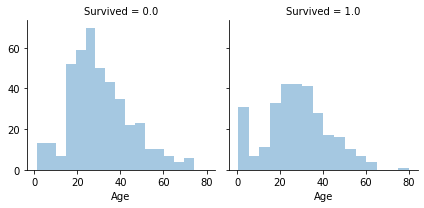

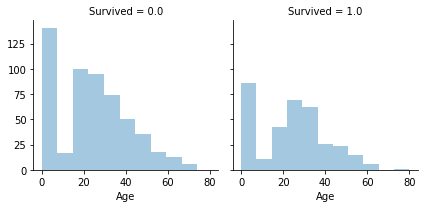

In [20]:
#以Age欄位為例,補值 - 補0

#補值前 平均值
print('合併資料集補值前的平均數為: ',df_TTmerged['Age'].mean()) 
print('合併資料集補值前的標準差為: ',df_TTmerged['Age'].std()) 

# 連續型用分布圖行來看
g = sns.FacetGrid(df_TTmerged, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

#補值後
df_TTmerged['Age']=df_TTmerged['Age'].fillna(0)
print('合併資料集補0後的平均數為: ',df_TTmerged['Age'].mean()) 
print('合併資料集補0後的標準差為: ',df_TTmerged['Age'].std()) 

# 連續型用分布圖行來看
g = sns.FacetGrid(df_TTmerged, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

#結論:用0 來補不是一個好的策略

合併資料集補值前的平均數為:  29.881137667304014
合併資料集補值前的標準差為:  14.413493211271334
合併資料集補平均值後的平均數為:  29.881137667303985
合併資料集補平均值後的標準差為:  12.883193243702001


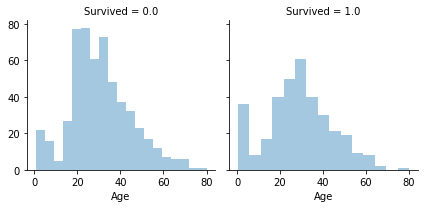

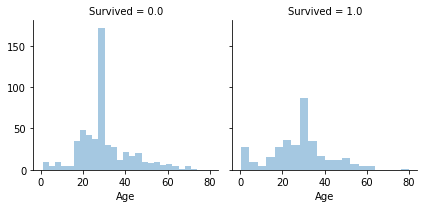

In [31]:
#補平均數
#重新讀入檔案
df_train = pd.read_csv('HWData/Titanic_train.csv')
df_test = pd.read_csv('HWData/Titanic_test.csv')
#合併2資料集
df_TTmerged1 = pd.concat([df_train,df_test])

#補值前 平均值
print('合併資料集補值前的平均數為: ',df_TTmerged1['Age'].mean()) 
print('合併資料集補值前的標準差為: ',df_TTmerged1['Age'].std()) 

# 連續型用分布圖行來看
g = sns.FacetGrid(df_TTmerged2, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

#補值後
df_TTmerged1['Age']=df_TTmerged1['Age'].fillna(df_TTmerged1['Age'].mean())
print('合併資料集補平均值後的平均數為: ',df_TTmerged1['Age'].mean()) 
print('合併資料集補平均值後的標準差為: ',df_TTmerged1['Age'].std()) 

# 連續型用分布圖行來看
g = sns.FacetGrid(df_TTmerged1, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

#結論:用平均數來補，會有集中於平均值的突柱

合併資料集補值前的平均數為:  29.881137667304014
合併資料集補值前的標準差為:  14.413493211271334
合併資料集補平均值後的平均數為:  29.88771996939556
合併資料集補平均值後的標準差為:  14.48476368019123


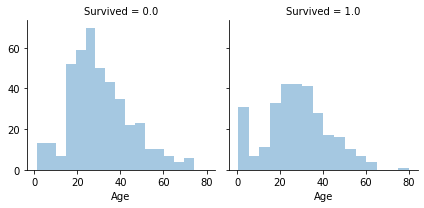

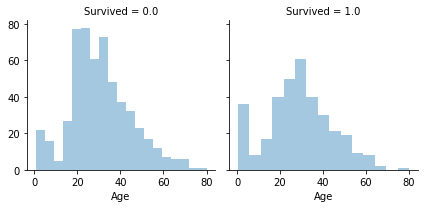

In [32]:
#補前值
#重新讀入檔案
df_train = pd.read_csv('HWData/Titanic_train.csv')
df_test = pd.read_csv('HWData/Titanic_test.csv')
#合併2資料集
df_TTmerged2 = pd.concat([df_train,df_test])

#補值前 平均值
print('合併資料集補值前的平均數為: ',df_TTmerged2['Age'].mean()) 
print('合併資料集補值前的標準差為: ',df_TTmerged2['Age'].std()) 

# 連續型用分布圖行來看
g = sns.FacetGrid(df_TTmerged2, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

#補值後
df_TTmerged2['Age']=df_TTmerged2['Age'].fillna(method='bfill')
print('合併資料集補前值後的平均數為: ',df_TTmerged2['Age'].mean()) 
print('合併資料集補前值後的標準差為: ',df_TTmerged2['Age'].std()) 

# 連續型用分布圖行來看
g = sns.FacetGrid(df_TTmerged2, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

#結論:用前數來補，比較不會集於於特定數